# Importing Liberaries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

#### Data Pre-Processing

In [2]:
# Load data with filtering and padding
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000, skip_top=20)

e:\Apps\Anaconda\envs\directml\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
e:\Apps\Anaconda\envs\directml\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [4]:
X_train

array([list([2, 2, 22, 2, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 4536, 1111, 2, 546, 38, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 22, 2, 1920, 4613, 469, 2, 22, 71, 87, 2, 2, 43, 530, 38, 76, 2, 2, 1247, 2, 22, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 5244, 2, 480, 66, 3785, 33, 2, 130, 2, 2, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 2, 22, 2, 215, 28, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 5952, 2, 256, 2, 2, 2, 3766, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 32, 2071, 56, 26, 141, 2, 194, 7486, 2, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 5535, 2, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 2, 38, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 32, 2, 2, 5345, 2, 178, 32]),
       list([2, 194, 1153, 194, 8255, 78, 228, 2, 2, 1463, 4369, 5012, 134, 26, 2

In [5]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

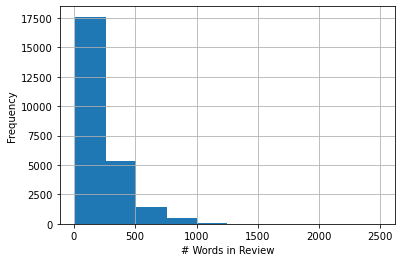

In [6]:

lengths = []

for rowid in range(len(X_train)):
  lengths.append(len(X_train[rowid]))

lengths = np.array(lengths)

plt.hist(lengths)
plt.ylabel("Frequency")
plt.xlabel("# Words in Review")
plt.grid()
plt.show()

In [7]:
np.quantile(lengths, [0.25, 0.5, 0.75, 0.9])

array([130., 178., 291., 467.])

In [8]:
maxlen = 178 #50% reviews have atmost 178 words
num_classes = 2  # For binary classification

# Pad sequences to ensure consistent length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)



#### Model Building

In [9]:
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim = 10000, output_dim=15))

# SimpleRNN layer
model.add(SimpleRNN(units=32, return_sequences=False))

# Dense output layer
model.add(Dense(num_classes, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy",
                 optimizer=Adam(learning_rate = 0.0005), 
                 metrics=["accuracy"])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)

# Train the model with validation split
model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 28s 1ms/sample - loss: 0.6912 - acc: 0.5275 - val_loss: 0.6855 - val_acc: 0.5631
Epoch 2/20
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.6280 - acc: 0.6691 - val_loss: 0.4829 - val_acc: 0.7825
Epoch 3/20
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.3851 - acc: 0.8395 - val_loss: 0.3700 - val_acc: 0.8423
Epoch 4/20
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.2691 - acc: 0.8970 - val_loss: 0.3568 - val_acc: 0.8515
Epoch 5/20
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.2129 - acc: 0.9226

In [10]:
# Evaluate model on validation set
loss, accuracy = model.evaluate(X_test, y_test)
print('Final Validation Accuracy:', round(accuracy,4), 'and Final Validation Loss:', round(loss,4))

25000/25000 [==============================] - 8s 310us/sample - loss: 0.3568 - acc: 0.8515
Final Validation Accuracy: 0.8515 and Final Validation Loss: 0.3568


In [11]:
# Saving the model
model.save('IMDB Sentiment Predictor.h5')